In [55]:
%matplotlib inline

import random
import numpy as np
from gridworld import GridworldEnv
from numpy import linalg as LA
import matplotlib.pyplot as plt
np.random.seed(0)
random.seed(0)

In [56]:
def value_iteration(env, theta=0.001, discount_factor=0.9):
    V = np.max(env.Rmat, -1)
    bot_left = [V[env.nS-env.shape[1]]]
    bot_right = [V[env.nS-1]]
    iters = 1
    while True:
        Q = np.zeros([env.nS, env.nA])
        for a in range(env.nA):
            Q[:, a] = env.Rmat[:, a] + discount_factor * np.dot(env.Pmat[:, :, a], V)
        best_action_value = np.max(Q, -1)
        delta = LA.norm(best_action_value - V, np.inf)
        V[:] = best_action_value
        bot_left.append(V[env.nS-env.shape[1]])
        bot_right.append(V[env.nS-1])
        iters += 1
        if delta < theta:
            break
    Q = np.zeros([env.nS, env.nA])
    for a in range(env.nA):
        Q[:, a] = env.Rmat[:, a] + discount_factor * np.dot(env.Pmat[:, :, a], V)
    best_action = np.argmax(Q, -1)
    policy = np.eye(env.nA)[best_action]
    return policy, V, iters, bot_left, bot_right

In [57]:
def policy_eval(env, policy, k=10000000, theta=0.001, discount_factor=0.9, init=None):
    V = np.zeros(env.nS) if init is None else init
    delta = 0
    cc = 0 
    while k != 0:
        Q = np.zeros([env.nS, env.nA])
        for a in range(env.nA):
            Q[:, a] = policy[:, a] * (env.Rmat[:, a] + discount_factor * np.dot(env.Pmat[:, :, a], V))
        best_action_value = np.max(Q, -1)
        delta = LA.norm(best_action_value - V, np.inf)
        V[:] = best_action_value
        k -= 1
        cc += 1
        if delta < theta:
            break
    return V, cc

In [58]:
def policy_iteration(env, theta=0.001, discount_factor=0.9):
    policy_stable = False
    np.random.seed(1)
    nums = np.random.randint(env.nA, size=env.nS)
    policy = np.eye(env.nA)[nums]
    V, cc = policy_eval(env, policy, theta = theta, discount_factor = discount_factor)
    iters = cc
    iters_list = []
    iters_list.append(iters)
    bot_left = [V[env.nS-env.shape[1]]]
    bot_right = [V[env.nS-1]]
    while True:
        chosen_action = np.argmax(policy, -1)
        Q = np.zeros([env.nS, env.nA])
        for a in range(env.nA):
            Q[:, a] = env.Rmat[:, a] + discount_factor * np.dot(env.Pmat[:, :, a], V)
        best_action = np.argmax(Q, -1)
        if np.all(chosen_action == best_action):
            policy_stable = True
        policy[:] = np.eye(env.nA)[best_action]
        V, cc = policy_eval(env, policy, theta = theta, discount_factor = discount_factor, init = V)
        bot_left.append(V[env.nS-env.shape[1]])
        bot_right.append(V[env.nS-1])
        iters += cc + 1
        iters_list.append(iters)
        if policy_stable:
            return policy, V, iters_list, bot_left, bot_right

In [59]:
def modified_policy_iteration(env, k=1, theta=0.001, discount_factor=0.9):
    policy_stable = False
    np.random.seed(1)
    nums = np.random.randint(env.nA, size=env.nS)
    policy = np.eye(env.nA)[nums]
    V_true, _ = policy_eval(env, policy, theta = theta, discount_factor= discount_factor)
    V, cc = policy_eval(env, policy, k=k, theta = theta, discount_factor= discount_factor)
    iters = cc
    iters_list = []
    iters_list.append(iters)
    bot_left = [V_true[env.nS-env.shape[1]]]
    bot_right = [V_true[env.nS-1]]
    while True:
        chosen_action = np.argmax(policy, -1)
        Q = np.zeros([env.nS, env.nA])
        for a in range(env.nA):
            Q[:, a] = env.Rmat[:, a] + discount_factor * np.dot(env.Pmat[:, :, a], V)
        best_action = np.argmax(Q, -1)
        if np.all(chosen_action == best_action):
            policy_stable = True
        policy[:] = np.eye(env.nA)[best_action]
        V, cc = policy_eval(env, policy, k = k, theta = theta, discount_factor = discount_factor, init = V)
        V_true, _ = policy_eval(env, policy, theta = theta, discount_factor = discount_factor, init = V_true)
        bot_left.append(V_true[env.nS-env.shape[1]])
        bot_right.append(V_true[env.nS-1])
        iters += cc + 1
        iters_list.append(iters)
        if policy_stable:
            return policy, V_true, iters_list, bot_left, bot_right

In [60]:
actions_display = {3: '\u2190', 2: '\u2193', 1: '\u2192', 0: '\u2191'}

def print_policy(pi):
    n = len(pi)
    for row in range(n):
        for col in range(n):
            print(actions_display[pi[row, col]], end=' ')
        print()
    return

Value iteration [p=0.9] converges in  89  iters
Value iteration [p=0.7] converges in  89  iters
Reshaped Grid Policy [p=0.9] (0=up, 1=right, 2=down, 3=left):
[[0 1 1 1 0]
 [1 1 1 1 0]
 [1 1 1 0 0]
 [0 1 0 0 0]
 [1 1 1 0 0]]
Reshaped Grid Value Function [p=0.9]:
[[ 9.99915359 68.8048883  78.82579251 88.79299467 99.99153585]
 [54.75393169 62.67339768 70.43466724 79.08732283 88.7936612 ]
 [49.87598089 55.88040514 62.73713658 70.43661776 78.85475038]
 [44.54295174 49.7877462  55.88487007 62.73113142 70.03635832]
 [39.98234669 44.66278808 50.0166903  56.01181846 62.37140084]]
Reshaped Grid Policy [p=0.7] (0=up, 1=right, 2=down, 3=left):
[[0 1 1 1 0]
 [1 1 1 1 0]
 [1 1 1 0 0]
 [0 1 0 0 0]
 [1 1 1 0 0]]
Reshaped Grid Value Function [p=0.7]:
[[ 9.99915359 59.15189358 72.80358218 85.41805694 99.99153585]
 [44.80119425 54.88115488 63.97530707 73.99771779 85.43741054]
 [41.82724939 48.03524993 55.46702306 64.02841641 73.07095588]
 [36.68268177 41.77820114 48.10868138 55.40060584 62.59260417]
 [32

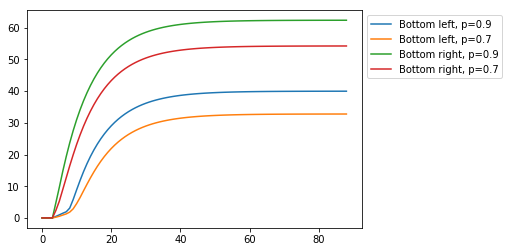

In [61]:
env0 = GridworldEnv(shape=(5,5), p=0.9)
policy0, v0, iters0, bot_left0, bot_right0 = value_iteration(env0)

env1 = GridworldEnv(shape=(5,5), p=0.7)
policy1, v1, iters1, bot_left1, bot_right1 = value_iteration(env1)

x_data0 = list(range(iters0))
x_data1 = list(range(iters1))
plt.plot(x_data0, bot_left0, label='Bottom left, p=0.9')
plt.plot(x_data1, bot_left1, label='Bottom left, p=0.7')
plt.plot(x_data0, bot_right0, label='Bottom right, p=0.9')
plt.plot(x_data1, bot_right1, label='Bottom right, p=0.7')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

print("Value iteration [p=0.9] converges in ", iters0, " iters")
print("Value iteration [p=0.7] converges in ", iters1, " iters")

print("Reshaped Grid Policy [p=0.9] (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy0, axis=1), env0.shape))

print("Reshaped Grid Value Function [p=0.9]:")
print(v0.reshape(env0.shape))

print("Reshaped Grid Policy [p=0.7] (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy1, axis=1), env1.shape))

print("Reshaped Grid Value Function [p=0.7]:")
print(v1.reshape(env1.shape))

In [62]:
p0 = np.reshape(np.argmax(policy0, axis=1), env0.shape)
print_policy(p0)

↑ → → → ↑ 
→ → → → ↑ 
→ → → ↑ ↑ 
↑ → ↑ ↑ ↑ 
→ → → ↑ ↑ 


In [63]:
p1 = np.reshape(np.argmax(policy1, axis=1), env1.shape)
print_policy(p1)

↑ → → → ↑ 
→ → → → ↑ 
→ → → ↑ ↑ 
↑ → ↑ ↑ ↑ 
→ → → ↑ ↑ 


Value iteration [p=0.9] converges in  89  iters
Value iteration [p=0.7] converges in  89  iters
Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):
[[0 3 3 ... 1 1 0]
 [0 3 3 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Reshaped Grid Value Function:
[[9.99915359e+00 8.87936603e+00 7.88546541e+00 ... 7.88546541e+01
  8.87936603e+01 9.99915359e+01]
 [8.87936603e+00 7.90873790e+00 7.04365747e+00 ... 7.04365747e+01
  7.90873790e+01 8.87936603e+01]
 [7.88546541e+00 7.04365747e+00 6.27369663e+00 ... 6.27369663e+01
  7.04365747e+01 7.88546541e+01]
 ...
 [3.83726453e-02 3.62822586e-02 3.30729139e-02 ... 3.30729139e-01
  3.62822586e-01 3.83726453e-01]
 [3.40312411e-02 3.21905469e-02 2.93518259e-02 ... 2.93518259e-01
  3.21905469e-01 3.40312411e-01]
 [3.02517862e-02 2.86261825e-02 2.61084170e-02 ... 2.61084170e-01
  2.86261825e-01 3.02517862e-01]]
Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):
[[0 3 3 ... 1 1 0]
 [0 0 3 ... 1 0 0]
 [0 0 0 

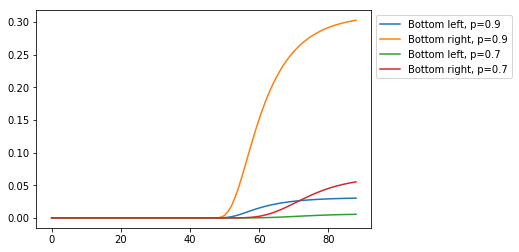

In [64]:
env0 = GridworldEnv(shape=(50,50), p=0.9)
policy0, v0, iters0, bot_left0, bot_right0 = value_iteration(env0)

env1 = GridworldEnv(shape=(50,50), p=0.7)
policy1, v1, iters1, bot_left1, bot_right1 = value_iteration(env1)

x_data0 = list(range(iters0))
x_data1 = list(range(iters1))
plt.plot(x_data0, bot_left0, label='Bottom left, p=0.9')
plt.plot(x_data0, bot_right0, label='Bottom right, p=0.9')
plt.plot(x_data1, bot_left1, label='Bottom left, p=0.7')
plt.plot(x_data1, bot_right1, label='Bottom right, p=0.7')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

print("Value iteration [p=0.9] converges in ", iters0, " iters")
print("Value iteration [p=0.7] converges in ", iters1, " iters")

print("Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy0, axis=1), env0.shape))

print("Reshaped Grid Value Function:")
print(v0.reshape(env0.shape))

print("Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy1, axis=1), env1.shape))

print("Reshaped Grid Value Function:")
print(v1.reshape(env1.shape))

In [65]:
p0 = np.reshape(np.argmax(policy0, axis=1), env0.shape)
print_policy(p0)

↑ ← ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ 
↑ ← ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ 
↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ← ← ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑

In [66]:
p1 = np.reshape(np.argmax(policy1, axis=1), env1.shape)
print_policy(p1)

↑ ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ 
↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ 
↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ 
↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ← ← ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑

Policy iteration [p=0.9] converges in  130  iterations of total updates and  6  iterations of policy improvement
Policy iteration [p=0.7] converges in  144  iterations of total updates and  5  iterations of policy improvement
Reshaped Grid Policy [p=0.9] (0=up, 1=right, 2=down, 3=left):
[[0 1 1 1 0]
 [1 1 1 1 0]
 [1 1 1 0 0]
 [0 1 0 0 0]
 [1 1 1 0 0]]
Reshaped Grid Value Function [p=0.9]:
[[ 9.99998874 68.81304184 78.83413882 88.80134609 99.9998874 ]
 [54.76207897 62.68173804 70.44301831 79.09567435 88.80201276]
 [49.8843146  55.88875473 62.74548738 70.44496924 78.86310192]
 [44.55127709 49.79608746 55.89322039 62.7394824  70.04470981]
 [39.99067083 44.67113303 50.0250377  56.02016921 62.37975207]]
Reshaped Grid Policy [p=0.7] (0=up, 1=right, 2=down, 3=left):
[[0 1 1 1 0]
 [1 1 1 1 0]
 [1 1 1 0 0]
 [0 1 0 0 0]
 [1 1 1 0 0]]
Reshaped Grid Value Function [p=0.7]:
[[ 9.99999742 59.15963764 72.81195379 85.42648822 99.99997424]
 [44.80878809 54.88942681 63.98370347 74.00614783 85.4458465 ]


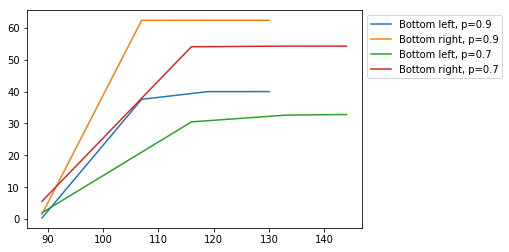

In [67]:
env0 = GridworldEnv(shape=(5,5), p=0.9)
policy0, v0, iters0, bot_left0, bot_right0 = policy_iteration(env0)

env1 = GridworldEnv(shape=(5,5), p=0.7)
policy1, v1, iters1, bot_left1, bot_right1 = policy_iteration(env1)

x_data0 = iters0
x_data1 = iters1
plt.plot(x_data0, bot_left0, label='Bottom left, p=0.9')
plt.plot(x_data0, bot_right0, label='Bottom right, p=0.9')
plt.plot(x_data1, bot_left1, label='Bottom left, p=0.7')
plt.plot(x_data1, bot_right1, label='Bottom right, p=0.7')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

print("Policy iteration [p=0.9] converges in ", iters0[-1], " iterations of total updates and ", len(iters0), " iterations of policy improvement")
print("Policy iteration [p=0.7] converges in ", iters1[-1], " iterations of total updates and ", len(iters1), " iterations of policy improvement")

print("Reshaped Grid Policy [p=0.9] (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy0, axis=1), env0.shape))

print("Reshaped Grid Value Function [p=0.9]:")
print(v0.reshape(env0.shape))

print("Reshaped Grid Policy [p=0.7] (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy1, axis=1), env1.shape))

print("Reshaped Grid Value Function [p=0.7]:")
print(v1.reshape(env1.shape))

In [68]:
p0 = np.reshape(np.argmax(policy0, axis=1), env0.shape)
print_policy(p0)

↑ → → → ↑ 
→ → → → ↑ 
→ → → ↑ ↑ 
↑ → ↑ ↑ ↑ 
→ → → ↑ ↑ 


In [69]:
p1 = np.reshape(np.argmax(policy1, axis=1), env1.shape)
print_policy(p1)

↑ → → → ↑ 
→ → → → ↑ 
→ → → ↑ ↑ 
↑ → ↑ ↑ ↑ 
→ → → ↑ ↑ 


Mod Policy iteration [p=0.9, k=1] converges in  7  iterations of total updates and  7  iterations of policy improvement
Mod Policy iteration [p=0.9, k=5] converges in  30  iterations of total updates and  6  iterations of policy improvement
Mod Policy iteration [p=0.9, k=15] converges in  89  iterations of total updates and  6  iterations of policy improvement
Mod Policy iteration [p=0.7, k=1] converges in  6  iterations of total updates and  6  iterations of policy improvement
Mod Policy iteration [p=0.7, k=5] converges in  30  iterations of total updates and  6  iterations of policy improvement
Mod Policy iteration [p=0.7, k=15] converges in  75  iterations of total updates and  5  iterations of policy improvement
Reshaped Grid Policy [p=0.9, k=15] (0=up, 1=right, 2=down, 3=left):
[[0 1 1 1 0]
 [1 1 1 1 0]
 [1 1 1 0 0]
 [0 1 0 0 0]
 [1 1 1 0 0]]
Reshaped Grid Value Function [p=0.9, k=15]:
[[ 9.99998874 68.81304184 78.83413882 88.80134609 99.9998874 ]
 [54.76207897 62.68173804 70.4430

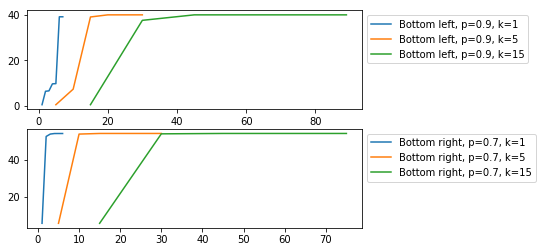

In [70]:
env0 = GridworldEnv(shape=(5,5), p=0.9)
policy00, v00, iters00, bot_left00, bot_right00 = modified_policy_iteration(env0, k=1)
policy01, v01, iters01, bot_left01, bot_right01 = modified_policy_iteration(env0, k=5)
policy02, v02, iters02, bot_left02, bot_right02 = modified_policy_iteration(env0, k=15)

print("Mod Policy iteration [p=0.9, k=1] converges in ", iters00[-1], " iterations of total updates and ", len(iters00), " iterations of policy improvement")
print("Mod Policy iteration [p=0.9, k=5] converges in ", iters01[-1], " iterations of total updates and ", len(iters01), " iterations of policy improvement")
print("Mod Policy iteration [p=0.9, k=15] converges in ", iters02[-1], " iterations of total updates and ", len(iters02), " iterations of policy improvement")

env1 = GridworldEnv(shape=(5,5), p=0.7)
policy10, v10, iters10, bot_left10, bot_right10 = modified_policy_iteration(env1, k=1)
policy11, v11, iters11, bot_left11, bot_right11 = modified_policy_iteration(env1, k=5)
policy12, v12, iters12, bot_left12, bot_right12 = modified_policy_iteration(env1, k=15)

print("Mod Policy iteration [p=0.7, k=1] converges in ", iters10[-1], " iterations of total updates and ", len(iters10), " iterations of policy improvement")
print("Mod Policy iteration [p=0.7, k=5] converges in ", iters11[-1], " iterations of total updates and ", len(iters11), " iterations of policy improvement")
print("Mod Policy iteration [p=0.7, k=15] converges in ", iters12[-1], " iterations of total updates and ", len(iters12), " iterations of policy improvement")

f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(iters00, bot_left00, label='Bottom left, p=0.9, k=1')
ax1.plot(iters01, bot_left01, label='Bottom left, p=0.9, k=5')
ax1.plot(iters02, bot_left02, label='Bottom left, p=0.9, k=15')
ax1.legend(bbox_to_anchor=(1, 1), loc=2)

ax2.plot(iters10, bot_right10, label='Bottom right, p=0.7, k=1')
ax2.plot(iters11, bot_right11, label='Bottom right, p=0.7, k=5')
ax2.plot(iters12, bot_right12, label='Bottom right, p=0.7, k=15')
ax2.legend(bbox_to_anchor=(1, 1), loc=2)

print("Reshaped Grid Policy [p=0.9, k=15] (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy02, axis=1), env0.shape))

print("Reshaped Grid Value Function [p=0.9, k=15]:")
print(v02.reshape(env0.shape))

print("Reshaped Grid Policy [p=0.7, k=15] (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy12, axis=1), env1.shape))

print("Reshaped Grid Value Function [p=0.7, k=15]:")
print(v12.reshape(env1.shape))

In [71]:
p0 = np.reshape(np.argmax(policy02, axis=1), env0.shape)
print_policy(p0)

↑ → → → ↑ 
→ → → → ↑ 
→ → → ↑ ↑ 
↑ → ↑ ↑ ↑ 
→ → → ↑ ↑ 


In [72]:
p1 = np.reshape(np.argmax(policy12, axis=1), env1.shape)
print_policy(p1)

↑ → → → ↑ 
→ → → → ↑ 
→ → → ↑ ↑ 
↑ → ↑ ↑ ↑ 
→ → → ↑ ↑ 


Policy iteration [p=0.9] converges in  388  iterations of total updates and  54  iterations of policy improvement
Policy iteration [p=0.7] converges in  355  iterations of total updates and  75  iterations of policy improvement
Reshaped Grid Policy [p=0.9] (0=up, 1=right, 2=down, 3=left):
[[0 3 3 ... 1 1 0]
 [0 0 3 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Reshaped Grid Value Function [p=0.9]:
[[1.00000000e+01 8.88021244e+00 7.88631183e+00 ... 7.88631183e+01
  8.88021244e+01 1.00000000e+02]
 [8.88021244e+00 7.90958431e+00 7.04450389e+00 ... 7.04450389e+01
  7.90958431e+01 8.88021244e+01]
 [7.88631183e+00 7.04450389e+00 6.27454304e+00 ... 6.27454304e+01
  7.04450389e+01 7.88631183e+01]
 ...
 [3.92190603e-02 3.71286736e-02 3.39193289e-02 ... 3.39193289e-01
  3.71286736e-01 3.92190603e-01]
 [3.48776561e-02 3.30369619e-02 3.01982409e-02 ... 3.01982409e-01
  3.30369619e-01 3.48776561e-01]
 [3.10982012e-02 2.94725975e-02 2.69548319e-02 ... 2

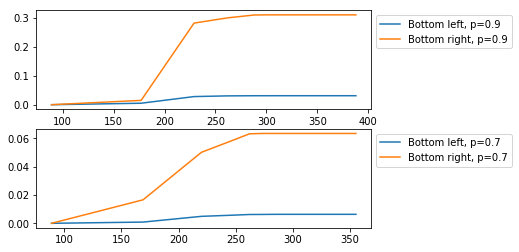

In [73]:
env0 = GridworldEnv(shape=(50,50), p=0.9)
policy0, v0, iters0, bot_left0, bot_right0 = policy_iteration(env0)

env1 = GridworldEnv(shape=(50,50), p=0.7)
policy1, v1, iters1, bot_left1, bot_right1 = policy_iteration(env1)

f, (ax1, ax2) = plt.subplots(2, 1)
x_data0 = iters0
x_data1 = iters1
ax1.plot(x_data0, bot_left0, label='Bottom left, p=0.9')
ax1.plot(x_data0, bot_right0, label='Bottom right, p=0.9')
ax1.legend(bbox_to_anchor=(1, 1), loc=2)

ax2.plot(x_data1, bot_left1, label='Bottom left, p=0.7')
ax2.plot(x_data1, bot_right1, label='Bottom right, p=0.7')
ax2.legend(bbox_to_anchor=(1, 1), loc=2)

print("Policy iteration [p=0.9] converges in ", iters0[-1], " iterations of total updates and ", len(iters0), " iterations of policy improvement")
print("Policy iteration [p=0.7] converges in ", iters1[-1], " iterations of total updates and ", len(iters1), " iterations of policy improvement")

print("Reshaped Grid Policy [p=0.9] (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy0, axis=1), env0.shape))

print("Reshaped Grid Value Function [p=0.9]:")
print(v0.reshape(env0.shape))

print("Reshaped Grid Policy [p=0.7] (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy1, axis=1), env1.shape))

print("Reshaped Grid Value Function [p=0.7]:")
print(v1.reshape(env1.shape))

In [74]:
p0 = np.reshape(np.argmax(policy0, axis=1), env0.shape)
print_policy(p0)

↑ ← ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ 
↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ 
↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ 
↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ← ← ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑

In [75]:
p1 = np.reshape(np.argmax(policy1, axis=1), env1.shape)
print_policy(p1)

↑ ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ 
↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ 
↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ← ← ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑

Mod Policy iteration [p=0.9, k=1] converges in  372  iterations of total updates and  372  iterations of policy improvement
Mod Policy iteration [p=0.9, k=5] converges in  372  iterations of total updates and  296  iterations of policy improvement
Mod Policy iteration [p=0.9, k=15] converges in  372  iterations of total updates and  225  iterations of policy improvement
Mod Policy iteration [p=0.7, k=1] converges in  353  iterations of total updates and  353  iterations of policy improvement
Mod Policy iteration [p=0.7, k=5] converges in  353  iterations of total updates and  282  iterations of policy improvement
Mod Policy iteration [p=0.7, k=15] converges in  353  iterations of total updates and  238  iterations of policy improvement
Reshaped Grid Policy [p=0.9, k=15] (0=up, 1=right, 2=down, 3=left):
[[0 3 3 ... 1 1 0]
 [0 0 3 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Reshaped Grid Value Function [p=0.9, k=15]:
[[1.00000000e+01 8.880

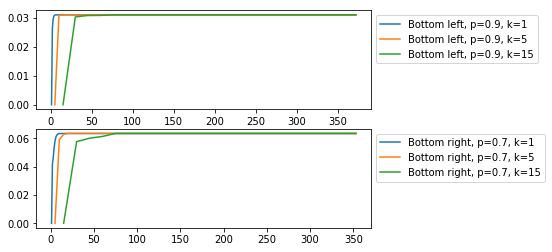

In [76]:
env0 = GridworldEnv(shape=(50,50), p=0.9)
policy00, v00, iters00, bot_left00, bot_right00 = modified_policy_iteration(env0, k=1)
policy01, v01, iters01, bot_left01, bot_right01 = modified_policy_iteration(env0, k=5)
policy02, v02, iters02, bot_left02, bot_right02 = modified_policy_iteration(env0, k=15)

print("Mod Policy iteration [p=0.9, k=1] converges in ", iters00[-1], " iterations of total updates and ", len(iters00), " iterations of policy improvement")
print("Mod Policy iteration [p=0.9, k=5] converges in ", iters01[-1], " iterations of total updates and ", len(iters01), " iterations of policy improvement")
print("Mod Policy iteration [p=0.9, k=15] converges in ", iters02[-1], " iterations of total updates and ", len(iters02), " iterations of policy improvement")

env1 = GridworldEnv(shape=(50,50), p=0.7)
policy10, v10, iters10, bot_left10, bot_right10 = modified_policy_iteration(env1, k=1)
policy11, v11, iters11, bot_left11, bot_right11 = modified_policy_iteration(env1, k=5)
policy12, v12, iters12, bot_left12, bot_right12 = modified_policy_iteration(env1, k=15)

print("Mod Policy iteration [p=0.7, k=1] converges in ", iters10[-1], " iterations of total updates and ", len(iters10), " iterations of policy improvement")
print("Mod Policy iteration [p=0.7, k=5] converges in ", iters11[-1], " iterations of total updates and ", len(iters11), " iterations of policy improvement")
print("Mod Policy iteration [p=0.7, k=15] converges in ", iters12[-1], " iterations of total updates and ", len(iters12), " iterations of policy improvement")

f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(iters00, bot_left00, label='Bottom left, p=0.9, k=1')
ax1.plot(iters01, bot_left01, label='Bottom left, p=0.9, k=5')
ax1.plot(iters02, bot_left02, label='Bottom left, p=0.9, k=15')
ax1.legend(bbox_to_anchor=(1, 1), loc=2)

ax2.plot(iters10, bot_right10, label='Bottom right, p=0.7, k=1')
ax2.plot(iters11, bot_right11, label='Bottom right, p=0.7, k=5')
ax2.plot(iters12, bot_right12, label='Bottom right, p=0.7, k=15')
ax2.legend(bbox_to_anchor=(1, 1), loc=2)

print("Reshaped Grid Policy [p=0.9, k=15] (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy02, axis=1), env0.shape))

print("Reshaped Grid Value Function [p=0.9, k=15]:")
print(v02.reshape(env0.shape))

print("Reshaped Grid Policy [p=0.7, k=15] (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy12, axis=1), env1.shape))

print("Reshaped Grid Value Function [p=0.7, k=15]:")
print(v12.reshape(env1.shape))

In [77]:
p0 = np.reshape(np.argmax(policy02, axis=1), env0.shape)
print_policy(p0)

↑ ← ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ 
↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ 
↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ 
↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ← ← ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑

In [78]:
p1 = np.reshape(np.argmax(policy12, axis=1), env1.shape)
print_policy(p1)

↑ ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ 
↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ 
↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ← ← → → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ← ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ← ← ← ← ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ← ← ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ← ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → → → → → → → → → → → → → → → → → → ↑ ↑ ↑ ↑ ↑ ↑

(0, 50)

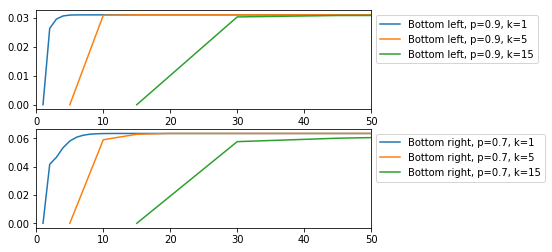

In [80]:
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(iters00, bot_left00, label='Bottom left, p=0.9, k=1')
ax1.plot(iters01, bot_left01, label='Bottom left, p=0.9, k=5')
ax1.plot(iters02, bot_left02, label='Bottom left, p=0.9, k=15')
ax1.legend(bbox_to_anchor=(1, 1), loc=2)
ax1.set_xlim([0, 50])

ax2.plot(iters10, bot_right10, label='Bottom right, p=0.7, k=1')
ax2.plot(iters11, bot_right11, label='Bottom right, p=0.7, k=5')
ax2.plot(iters12, bot_right12, label='Bottom right, p=0.7, k=15')
ax2.legend(bbox_to_anchor=(1, 1), loc=2)
ax2.set_xlim([0, 50])